In [1]:
import importlib
import dbops
import numpy as np
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
import glob

In [2]:
importlib.reload(dbops)  # Reload the module from source

<module 'dbops' from '/scratch/u1319464/Data-Mining-Spring-2025-Project/dbops.py'>

In [39]:
movie_ref = dbops.Movie.iterate_all_movies()[14]
str(movie_ref)

'Taxi Driver'

In [40]:
imdb_id = movie_ref.get_imdb_id()
title = movie_ref.get_title()
frame_idx_timeline = []
num_faces_timeline = []
color_timeline = []
for frame_ref in tqdm(movie_ref.iterate_frames()):
    # if not frame_ref.is_fully_cached():
    #     print(f'Uncached frame found: {frame_ref.frame_index}')
    
    frame_idx_timeline.append(frame_ref.frame_index)
    try:
        num_faces_timeline.append(frame_ref.get_num_faces())
    except:
        num_faces_timeline.append(0)
    
    c = frame_ref.get_average_color()
    color_timeline.append(c)

color_timeline = np.array(color_timeline) / 255


100%|██████████████████████████████████████████████████████████████████████████████████████████| 1484/1484 [00:03<00:00, 413.11it/s]


In [41]:
from matplotlib.colors import rgb_to_hsv, hsv_to_rgb

def fudge_luminance(colors, l=1):
    hsv = rgb_to_hsv(colors)
    hsv[:,2]*=l
    return hsv_to_rgb(hsv.clip(0,1))

Text(0.5, 1.0, 'Overall Processing Progress of "Taxi Driver"')

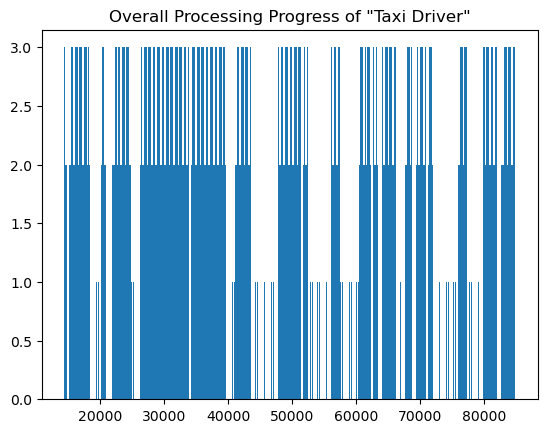

In [42]:
plt.hist(
    frame_idx_timeline,
    bins=15*60 # for every interval of ~15 seconds
)
plt.title(f'Overall Processing Progress of "{title}"')

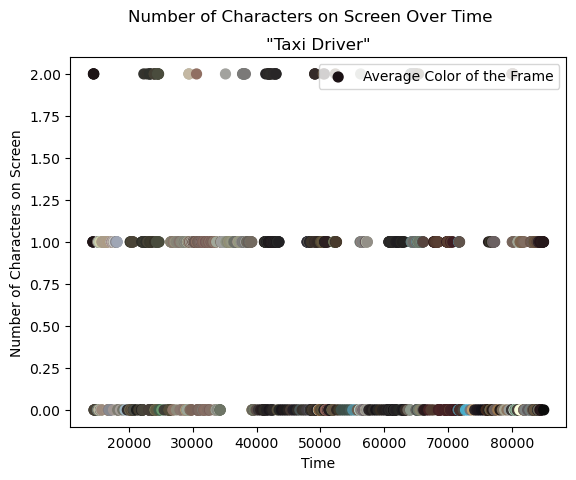

In [45]:

# draw lighter colors on top so we don't see just the darker ones
# draw_order = np.argsort(np.linalg.norm(color_timeline, axis=1))
draw_order = np.argsort(frame_idx_timeline)

plt.scatter(
    np.array(frame_idx_timeline)[draw_order],
    np.array(num_faces_timeline)[draw_order],
    s=50,
    c=fudge_luminance(np.array(color_timeline)[draw_order], l=1.5),
    label='Average Color of the Frame',
    # marker='*'
)

# an obvious artifact seen in this figure is the overlapping of the lines
# this means that the camera was shooting around, and captured fewer people in some shots, whith more or all the characters in other shots
# this could be fixed by sliding a window over time to get the number of people in a scene rather than in a frame

plt.suptitle('Number of Characters on Screen Over Time')
plt.title(f'"{title}"')
plt.xlabel('Time')
plt.ylabel('Number of Characters on Screen')
plt.legend()
None

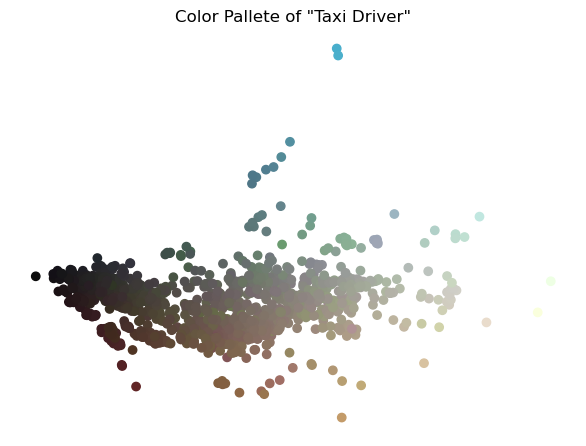

In [44]:
import numpy as np
from sklearn.decomposition import PCA

X = np.concatenate([
    color_timeline,
    # np.array(num_faces_timeline)[:,np.newaxis],
    # np.array(frame_idx_timeline)[:,np.newaxis]
], axis=1)

# Initialize PCA with 2 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], color=fudge_luminance(color_timeline, l=1.5), label='PCA Transformed Data')
plt.title(f'Color Pallete of "{title}"')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.legend()
plt.tight_layout()
plt.axis('off')

plt.show()